In [1]:
using Distributions
using Random
using Roots
using StatsBase
using StatsPlots

In [2]:
function pvalue_t(x, μ=1.0)
    n, x̄, s = length(x), mean(x), std(x)
    t = √n * (x̄ - μ)/s
    2ccdf(TDist(n-1), abs(t))
end

function pvalue_e(x, μ=1.0)
    n, sumx = length(x), sum(x)
    gam = Gamma(n, μ)
    min(1, 2cdf(gam, sumx), 2ccdf(gam, sumx))
end

function sim_pvals(; dist=Exponential(), n=10, L=10^5)
    μ = mean(dist)
    p_t = similar(zeros(), L)
    p_e = similar(p_t)
    tmp = similar(p_t, n)
    for i in 1:L
        x = rand!(dist, tmp)
        p_t[i] = pvalue_t(x, μ)
        p_e[i] = pvalue_e(x, μ)
    end
    p_t, p_e
end

function plot_pvals(; dist=Exponential(), n=10, L=10^5)
    p_t, p_e = sim_pvals(; dist, n, L)
    e_t = ecdf(p_t)
    e_e = ecdf(p_e)
    f(x) = e_t(x)
    g(x) = e_e(x)
    plot(legend=:topleft)
    plot!(f, 0, 0.1; label="t-test")
    plot!(g; label="exp model test", ls=:dash)
    plot!(identity; label="", ls=:dot, c=:black)
    title!("$dist, n=$n", titlefontsize=8)
    plot!(xtick=0:0.01:1, ytick=0:0.01:1, tickfontsize=6)
    plot!(xguide="significance level α",
        yguide="probability of P-value ≤ α",
        guidefontsize=8)
    plot!(size=(300, 320))
end

plot_pvals (generic function with 1 method)

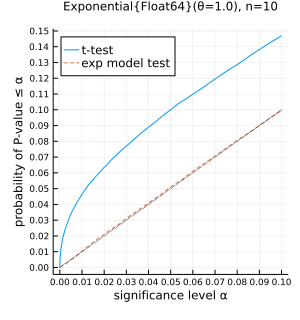

In [3]:
plot_pvals(n=10)

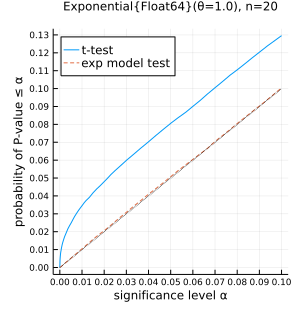

In [4]:
plot_pvals(n=20)

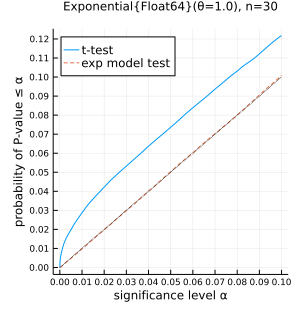

In [5]:
plot_pvals(n=30)

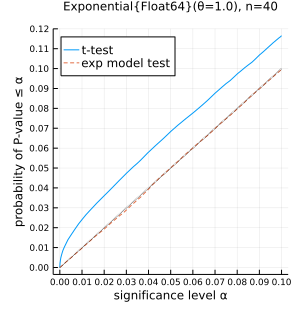

In [6]:
plot_pvals(n=40)

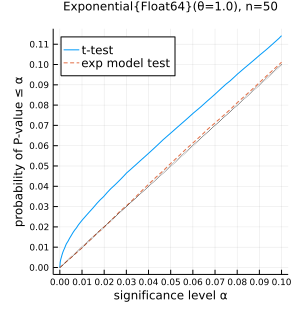

In [7]:
plot_pvals(n=50)

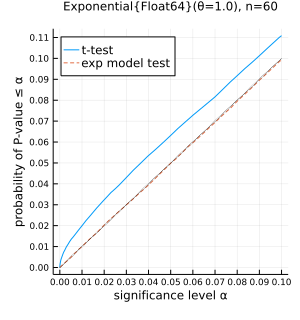

In [8]:
plot_pvals(n=60)

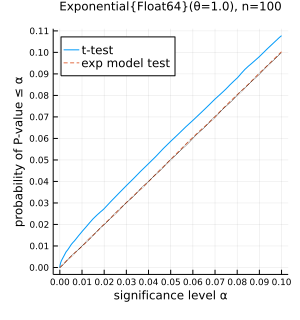

In [9]:
plot_pvals(n=100)

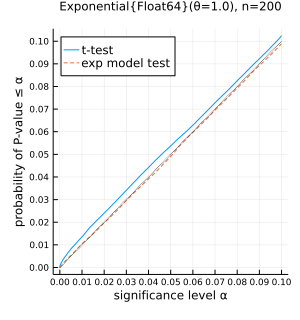

In [10]:
plot_pvals(n=200)

In [11]:
function confint_t(x, α=0.05)
    n, x̄, s = length(x), mean(x), std(x)
    c = quantile(TDist(n-1), 1-α/2)
    (x̄ - c*s/√n, x̄ + c*s/√n)
end

function confint_e(x, α=0.05; a=-10, b=10)
    f(t) = pvalue_e(x, exp(t)) - α
    exp.(find_zeros(f, a, b))
end

function plot_confints(; dist=Exponential(), n=10, L=100, a=-10, b=10)
    tmp = similar(zeros(), n)
    plot(legend=:outertop)
    i = 1
    x = rand!(dist, tmp)
    ci_t = confint_t(x) |> collect
    plot!(fill(i-0.15, 2), ci_t; c=1, lw=2,
        label="95% confidence intervals of mean for t-test (n = $n)")
    ci_e = confint_e(x; a, b) |> collect
    plot!(fill(i+0.15, 2), ci_e; c=2, lw=2,
        label="95% confidence intervals of mean with exp dist model")
    for i in 2:L
        x = rand!(dist, tmp)
        ci_t = confint_t(x) |> collect
        plot!(fill(i-0.15, 2), ci_t; c=1, lw=2, label="")
        ci_e = confint_e(x; a, b) |> collect
        plot!(fill(i+0.15, 2), ci_e; c=2, lw=2, label="")
    end
    plot!(size=(800, 200))
end

plot_confints (generic function with 1 method)

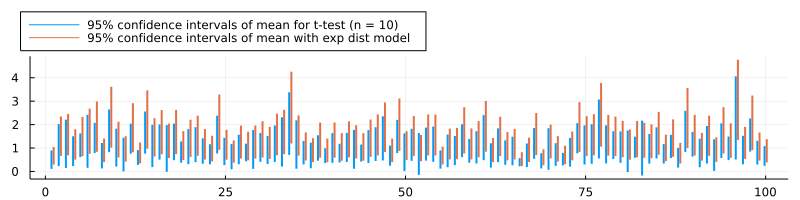

In [12]:
plot_confints(n=10)

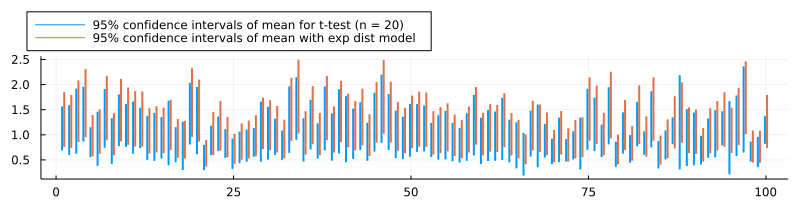

In [13]:
plot_confints(n=20)

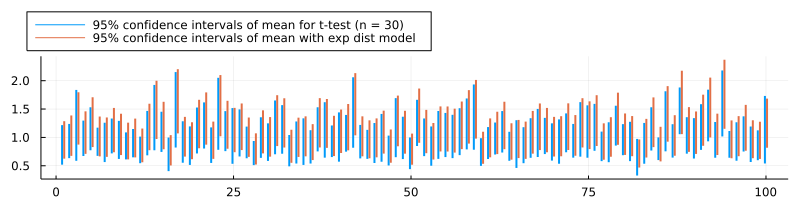

In [14]:
plot_confints(n=30)

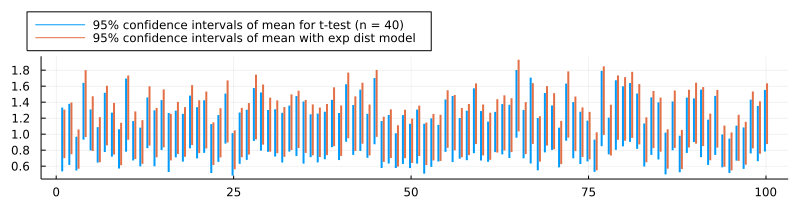

In [15]:
plot_confints(n=40)

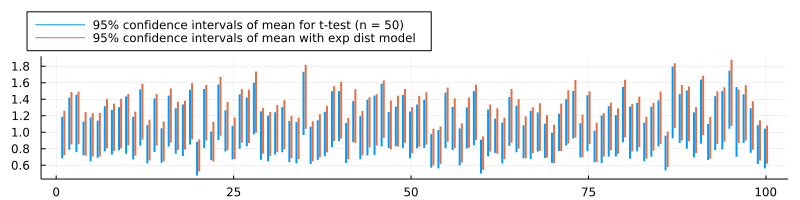

In [16]:
plot_confints(n=50)

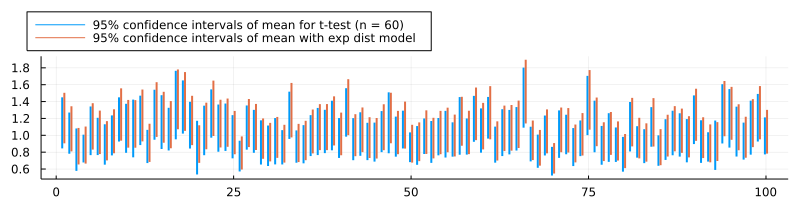

In [17]:
plot_confints(n=60)

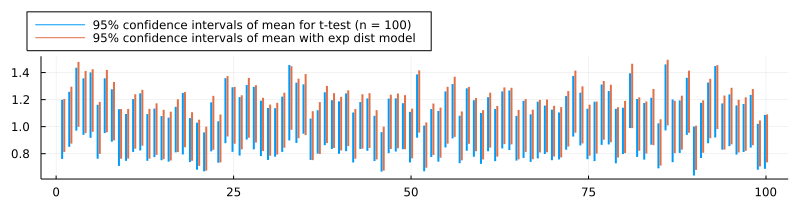

In [18]:
plot_confints(n=100)

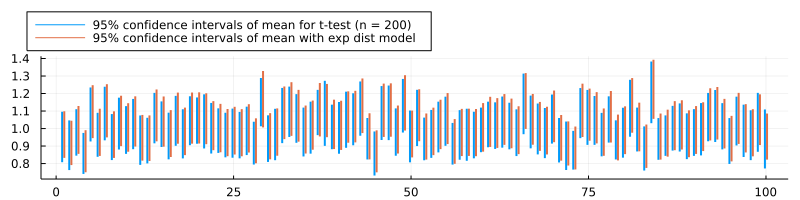

In [19]:
plot_confints(n=200)